# Rec Sys -> Collaborative Filtering & DL Techniques
* **You can also view and contribute to the notebook below.**
* **Github - [Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques](https://github.com/Chinmayrane16/Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques)**
* **Do Star/Upvote if you like it :)**

# What are Recommendation Systems?

Every day we view and purchase products on Amazon, browse Netflix, stream music on Spotify. Have you ever wondered how accurately they know your tastes and preferences and make Recommendations based on your interests ?

The answer is they have personalized Recommendation Engines which uses advanced algorithms to recommend products to you... When you want to watch a new movie, you usually ask your friends for suggesting movies, they know your interests and accordingly they suggest you a good movie.

So, **Recommendation Systems work the same way, they are nothing but data filtering tools that uses algorithms to recommend most relevant items to a particular user.**

Now, let us understand Why do we need Recommendation Systems and in the later part we will look at How Recommender Systems actually work?

![](https://i.imgur.com/DlXYzzg.jpg)

# Why do we need Recommendation Systems?

Internet is a vast ocean of Information, it consists of millions of items, a really large catalogue of products. There are some Users that know what they are looking for whereas others have no idea what to look for in such a large library of resources, and thus, Recommendation Systems play a vital role.

There are some products which may be really good but have not gained **Popularity** since they have not been advertised, so recommendation systems help such items gain popularity by bringing such items to one's notice.

It even helps in **Ad Targeting**- Say you're looking to buy a new laptop on Internet, your recent searches are based on laptop suggestions, and soon you'll start seeing ads on websites offering discounts on laptops. So, Ad Targeting is an advertisement technique meant to deliver ads automatically by using specialized software and algorithms that place ads depending on the user’s recent searches. Ad targeting was pegged to have secured 2.7 times as much revenue as non-targeted ads, as shown by a study conducted in 2009 by the Network Advertising Initiative.

Thus, it also helps in **Increasing Revenues** of the product's Organization.

# Contents
1. [**Exploring the Dataset**](#there_you_go_1)
> *  [1.1 Importing Libraries ](#there_you_go_1.1)
  * [1.2 Extract dataset ](#there_you_go_1.2)
  >> * [1.2.1 Ratings](#there_you_go_1.2.1)
    * [1.2.2 Movies](#there_you_go_1.2.2)
  * [1.3 Combining the Movies and Ratings Dataframe ](#there_you_go_1.3)
2. [**Visualizing the Dataset**](#there_you_go_2)
> * [2.1 Genres ](#there_you_go_2.1)
  * [2.2 Heavily Rated Movies ](#there_you_go_2.2)
  * [2.3 Highly rated Movies](#there_you_go_2.3)
  * [2.4 Mean ratings vs Total number of ratings](#there_you_go_2.4)
3. [**Collaborative Filtering**](#there_you_go_3)
> * [3.1 Create User-Item Matrix ](#there_you_go_3.1)
 * [3.2 Memory Based CF ](#there_you_go_3.2)
 >> * [3.2.1 User Based CF](#there_you_go_3.2.1)
     * [3.2.2 Item based CF](#there_you_go_3.2.2)
 * [3.3 Model Based CF ](#there_you_go_3.3)
 >> * [3.3.1 K-Nearest Neighbour](#there_you_go_3.3.1)
    * [3.3.2 Singular Value Decomposition](#there_you_go_3.3.2)
    * [3.3.3 Non-Negative Matrix Factorization](#there_you_go_3.3.3)
4. [**Matrix Factorization using Deep Learning**](#there_you_go_4)
> * [4.1 Splitting Data into Train and Validation Set ](#there_you_go_4.1)
 * [4.2 Building the Model using Embedding Layers ](#there_you_go_4.2)
 * [4.3 Architecture 1 ](#there_you_go_4.3)
 * [4.4 Visulaizing the Model Architecture](#there_you_go_4.4)
 * [4.5 Compiling the Model ](#there_you_go_4.5)
 * [4.6 Fitting the Model](#there_you_go_4.6)
 * [4.7 Plotting Validation Curves](#there_you_go_4.7)
 * [4.8 Evaluating RMSE](#there_you_go_4.8)
 * [4.9 Architecture 2](#there_you_go_4.9)
 * [4.10 Visulaizing the Model Architecture](#there_you_go_4.10)
 * [4.11 Compiling the Model ](#there_you_go_4.11)
 * [4.12 Fitting the Model](#there_you_go_4.12)
 * [4.13 Plotting Validation Curves](#there_you_go_4.13)
 * [4.14 Evaluating RMSE](#there_you_go_4.14)
5. [**References**](#there_you_go_5)

<a id="there_you_go_1"></a>
# 1) Exploring the Dataset
The dataset we are going to use is the MovieLens Dataset, which cotains 100k ratings of approximately 9000 movies by 700 users.
Let's have a look at the dataset.

<a id="there_you_go_1.1"></a>
## 1.1) Importing the Libraries 

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Using TensorFlow backend.


In [2]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


# Make Visualizations better
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [3]:
import os
print(os.listdir('../input/'))

['movies.csv', 'ratings.csv', 'README.txt', 'tags.csv', 'links.csv']


<a id="there_you_go_1.2"></a>
## 1.2) Extract Dataset

In [4]:
ratings = pd.read_csv('../input/ratings.csv')
movies = pd.read_csv('../input/movies.csv')
df_r = ratings.copy()
df_m = movies.copy()

<a id="there_you_go_1.2.1"></a>
### 1.2.1) Ratings

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


As you can see the "ratings" dataframe has 4 columns.
* **userId** - Every user is represented by an unique Id.
* **movieId** - Every movie is represented by an uniue Id.
* **rating** - Represents the rating given by the user to the corresponding movie.
* **timestamp** - The time at which the rating was recorded.

In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Some insights that can be drawn are:

1. The minimum rating given to the movie is 0,5 whereas the maximum rating given to the movies is 5.0
2. The average rating that is the mean ratings given by the users to all the movies is 3.5
3. The users have userId's in the range 1 - 610
4. The movies have movieId's in the range 1 - 193609.( Note that 193609 is the highest movieId and not total number of movies. )

Here, we will be dropping the timestamp attribute as we are not concerned with when the user rated a particular movie.

In [8]:
ratings.drop(['timestamp'], axis=1, inplace=True)

In [9]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


<a id="there_you_go_1.2.2"></a>
### 1.2.2) Movies

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


As you can see the "movies" dataframe has 3 columns:
* **movieId** - Every movie is represented by an unique Id.
* **title** - Movie which is represented by the corresponding movieId.
* **genres** - Represents category of the movie.

In [11]:
print('Shape: ', movies.shape, '\n')
movies.info()

Shape:  (9742, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


<a id="there_you_go_1.3"></a>
## 1.3) Combining the Movies and Ratings DataFrame
Let's have a combined view on both the ratings and movies dataframe.

And for that we need to merge on "movieId" attribute since it is common between both the dataframes.

In [12]:
df_combined = pd.merge(ratings, movies, on = 'movieId')

In [13]:
df_combined.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
df_combined.shape

(100836, 5)

<a id="there_you_go_2"></a>
# 2) Visualizations on the Dataset

<a id="there_you_go_2.1"></a>
## 2.1) Genres
Lets have a look at various genres in the Dataset.

In [15]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [16]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [17]:
# replace '(no genres listed)' by 'None'
genres['None'] = genres.pop('(no genres listed)')

<a id="there_you_go_2.1.1"></a>
### 2.1.1) Genre WordCloud

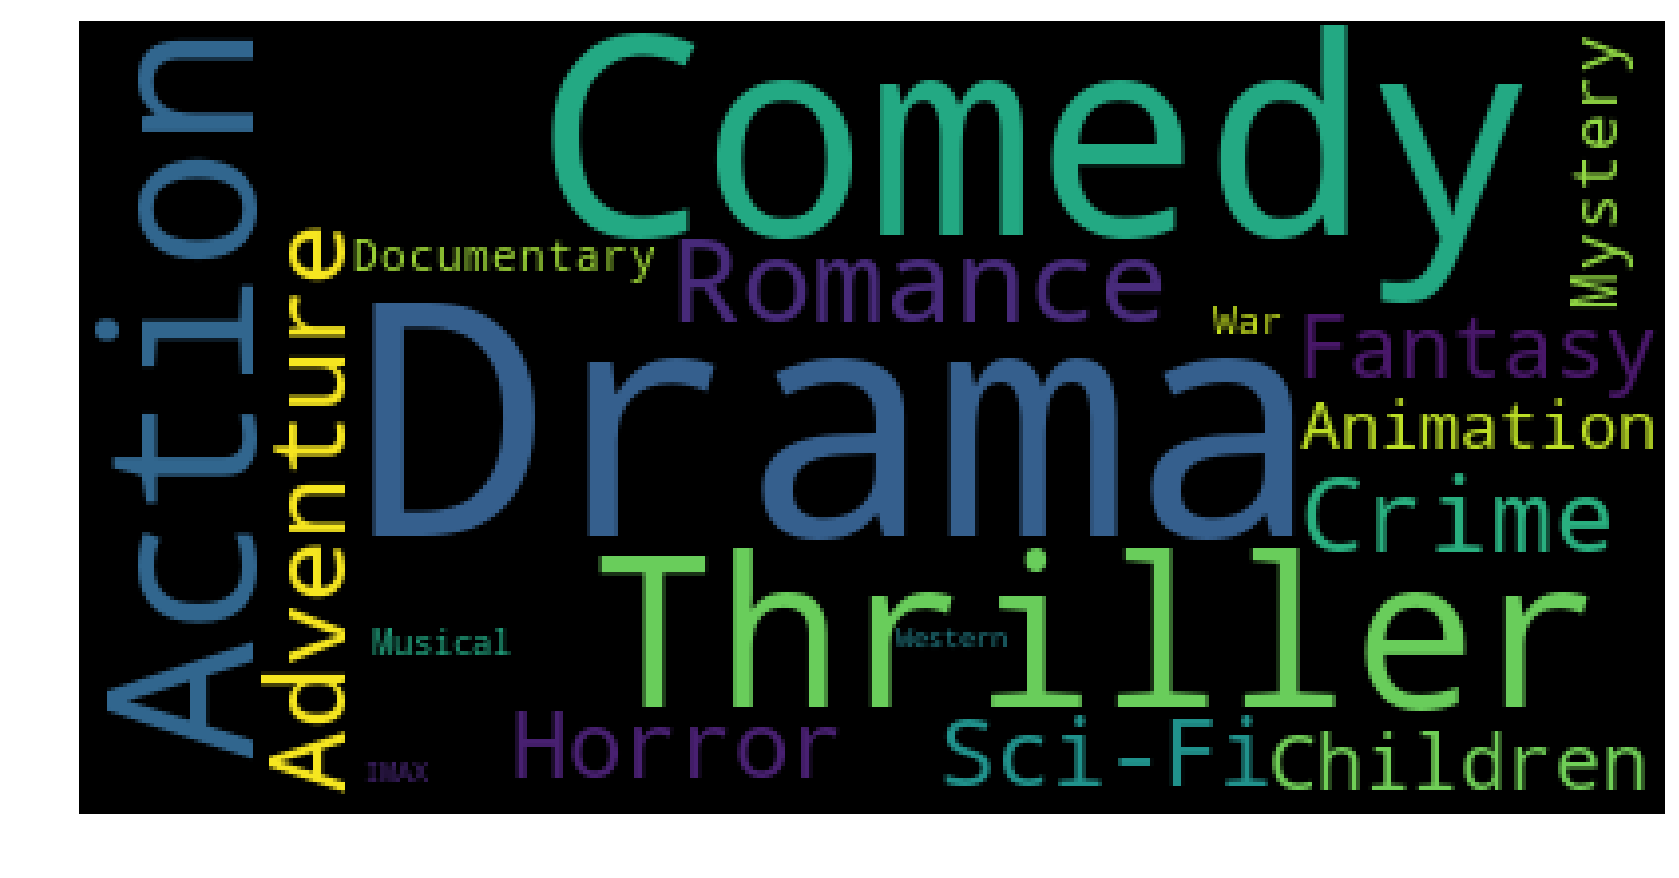

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a id="there_you_go_2.2"></a>
## 2.2) Heavily Rated Movies

In [19]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Most of these movies stand among the Top 50 movies in the IMDB ratings even today.

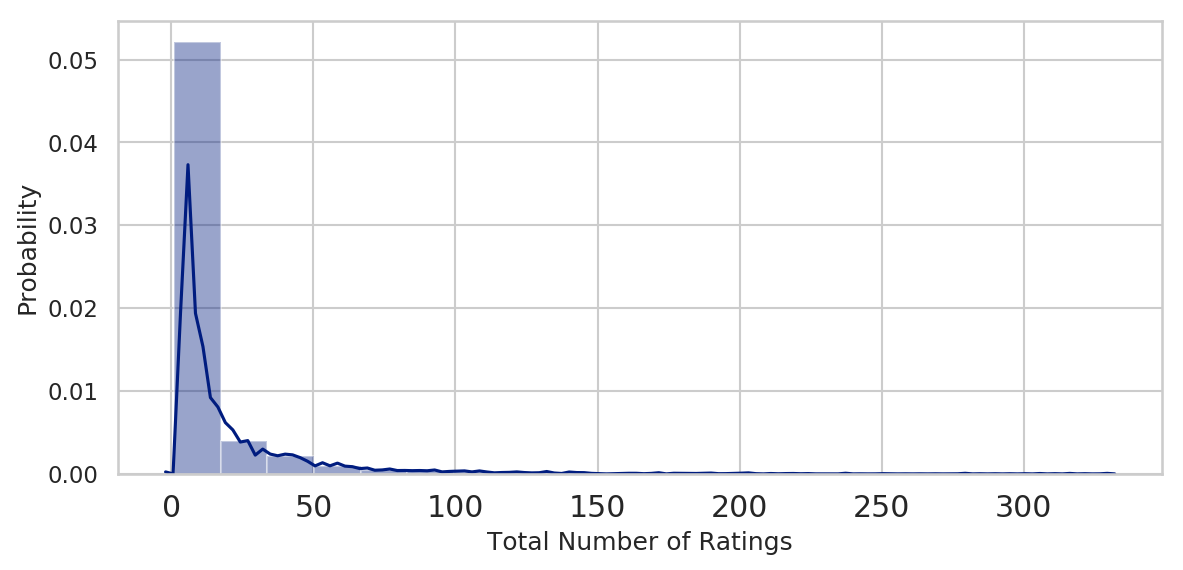

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

We can see that - 
* Majority of the movies have less than 50 ratings.
* The number of movies having more than 100 ratings is very low.

Refer one cell above, we can see that there are only 3 movies with 300+ ratings.

<a id="there_you_go_2.3"></a>
## 2.3) Highly Rated Movies

In [21]:
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
"Thin Line Between Love and Hate, A (1996)",5.0,1
Lesson Faust (1994),5.0,2
Eva (2011),5.0,1
Who Killed Chea Vichea? (2010),5.0,1


In [22]:
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  296 

Total no of Individual users that gave rating of 5.0 :  289


1. As you can see there are over 296 users that have rated 5 stars, among which there are 289 individual raters ( only user to rate the movie 5 star ).

2. So, this cannot be the lone factor that should be considered while recommending movies. As this factor only shows the preferences of a particular user.

3. It would make a good recommendation system if we can use both the factors ( -> Highly Rated Movies and Heavily Rated Movies <- ) together.

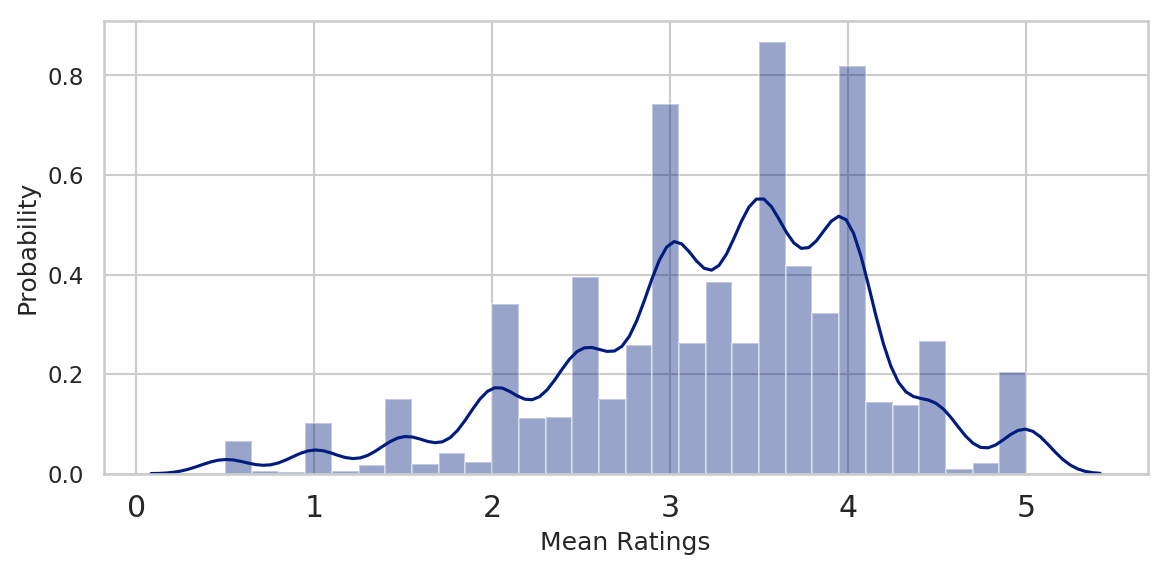

In [23]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

<a id="there_you_go_2.4"></a>
## 2.4) Mean Ratings vs Total Number of Ratings

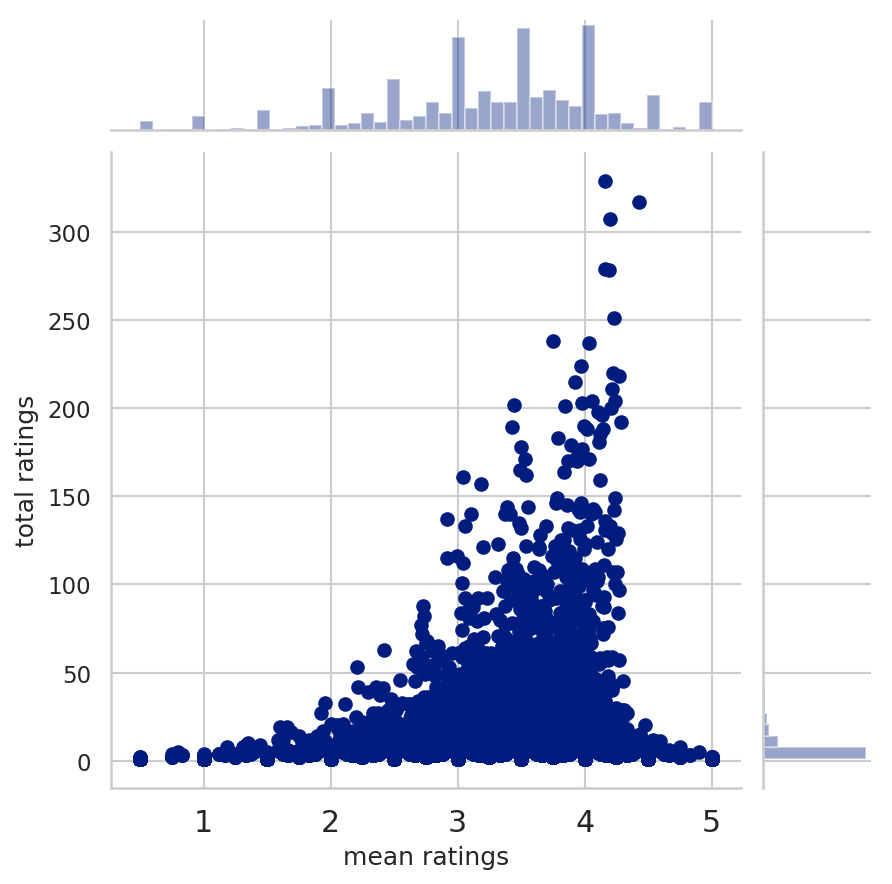

In [24]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

* Here, as you can see every Data Point represents a distinct Movie, with y-coordinate representing the total no of users which has rated that movie and x-coordinate representing the mean of all the ratings of the corresponding users.
* Also you can see that there is a huge Density in the region corresponding to 0-50 no of users and between mean rating 3-4 .

Many more Visualizations can be drawn and many different conclusions can be inferred, But here, I'm going to focus on Collaborative Filtering.

So, let's proceed to what is Collaborative Filtering and how it is used in Recommendation Systems?

<a id="there_you_go_4"></a>
# 4) Matrix Factorization using Deep Learning (Keras)

In [25]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

<a id="there_you_go_4.1"></a>
## 4.1)Splitting Data into Train and Validation Set

In [26]:
X = ratings.iloc[:,:2]
Y = ratings.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

<a id="there_you_go_4.2"></a>
## 4.2) Building the Model using Embedding Layers

An embedding is a mapping from discrete objects, such as words or movies in our case, to a vector of continuous values. These are used to find similarities between discrete objects. 

The concept behind matrix factorization models is that the preferences of a user can be determined by a small number of hidden factors. And these are called as **Embeddings**.

![Imgur](https://i.imgur.com/zGQJFLD.png)

As you can see in the image, there are 2 features both for user and the items. These are the latent factors or the hidden factors. These factors have a value for the corresponding user and determines to what extend that user likes the feature.

For Eg. the features for the user could be ->
* How much he likes action movies?
* Whether he likes old movies?

And the features for the movies could be ->
* To what scale is it an action movie?
* Whether the movie is recently released?

And finally we take **dot product** which gives us the user's rating for the movie, 

**Estimated Rating** = [ (How much he likes action movies?) x (To what scale is it an action movie) ]  +  [ (Whether he likes old movies?) x (Whether the movie is recently released) ]

In [27]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(ratings['userId'].unique()), len(ratings['movieId'].unique()) 

<a id="there_you_go_4.3"></a>
## 4.3) Architecture 1

In [28]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)


# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)


# Dot Product
merged_vectors = dot([user_vector, movie_vector], name='Dot_Product', axes=1)
model = Model([user_input, movie_input], merged_vectors)

<a id="there_you_go_4.4"></a>
## 4.4) Visualizing the Model Architecture

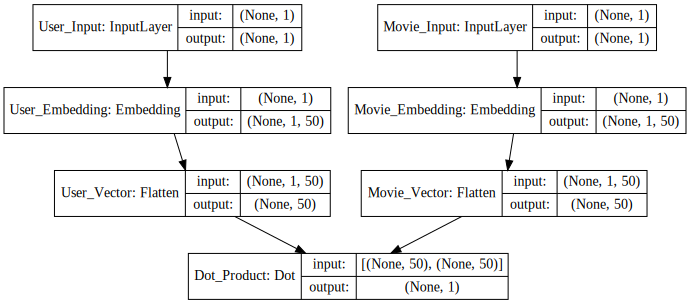

In [29]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [30]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User_Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Movie_Input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
User_Embedding (Embedding)      (None, 1, 50)        30500       User_Input[0][0]                 
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 50)        486200      Movie_Input[0][0]                
__________________________________________________________________________________________________
User_Vecto


<a id="there_you_go_4.5"></a>
## 4.5) Compiling the Model

In [31]:
import keras.backend as K

optimizer = Adam(lr = 0.0005)

model.compile(loss='mean_squared_error', optimizer = optimizer, metrics = ['accuracy'])

<a id="there_you_go_4.6"></a>
## 4.6) Fitting the Model

In [32]:
batch_size = 128
epochs = 20

In [33]:
history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userId'], x_test['movieId']], y_test))

Train on 80668 samples, validate on 20168 samples
Epoch 1/20
 - 6s - loss: 13.3356 - acc: 0.0000e+00 - val_loss: 12.9812 - val_acc: 0.0000e+00
Epoch 2/20
 - 3s - loss: 11.0575 - acc: 0.0080 - val_loss: 8.0642 - val_acc: 0.0314
Epoch 3/20
 - 2s - loss: 6.2983 - acc: 0.0826 - val_loss: 5.2491 - val_acc: 0.1221
Epoch 4/20
 - 2s - loss: 4.7860 - acc: 0.1524 - val_loss: 4.5375 - val_acc: 0.1723
Epoch 5/20
 - 2s - loss: 4.2771 - acc: 0.1938 - val_loss: 4.2153 - val_acc: 0.2019
Epoch 6/20
 - 3s - loss: 4.0258 - acc: 0.2206 - val_loss: 4.0425 - val_acc: 0.2203
Epoch 7/20
 - 2s - loss: 3.8829 - acc: 0.2364 - val_loss: 3.9427 - val_acc: 0.2309
Epoch 8/20
 - 2s - loss: 3.7942 - acc: 0.2473 - val_loss: 3.8821 - val_acc: 0.2397
Epoch 9/20
 - 2s - loss: 3.7352 - acc: 0.2558 - val_loss: 3.8423 - val_acc: 0.2452
Epoch 10/20
 - 3s - loss: 3.6939 - acc: 0.2617 - val_loss: 3.8170 - val_acc: 0.2470
Epoch 11/20
 - 2s - loss: 3.6625 - acc: 0.2656 - val_loss: 3.7981 - val_acc: 0.2509
Epoch 12/20
 - 2s - loss

<a id="there_you_go_4.7"></a>
## 4.7) Plotting Validation Curves

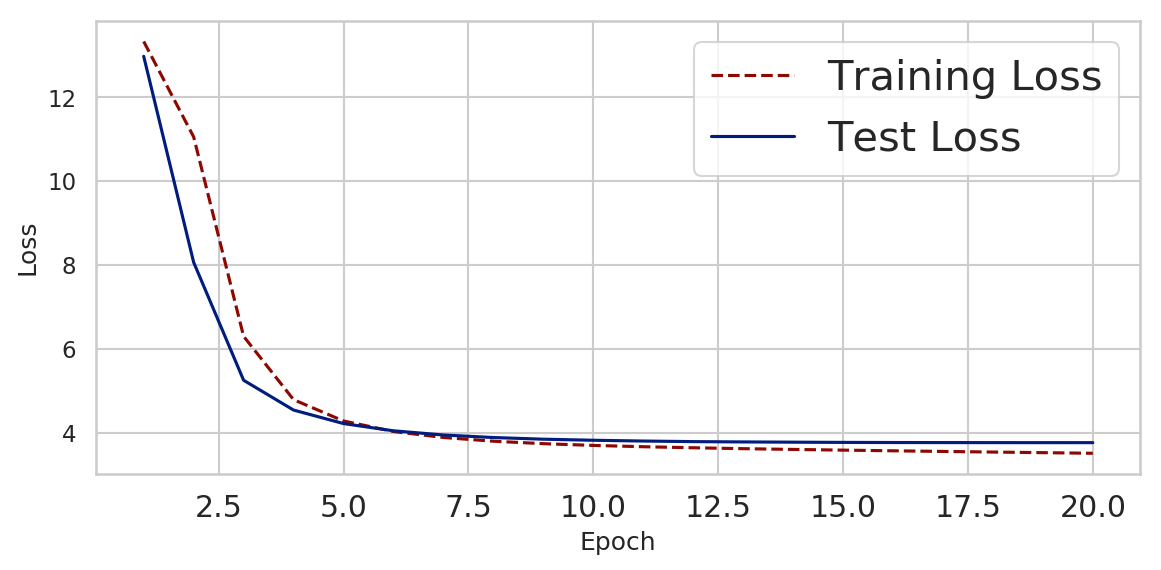

In [34]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<a id="there_you_go_4."></a>
## 4.8) Evaluating RMSE and Accuracy

In [35]:
score = model.evaluate([x_test['userId'], x_test['movieId']], y_test)

print('RMSE: {:.4f}'.format(np.sqrt(score[0])))
print('Accuracy of Model: ',score[1] )

20168/20168 [==============================] - 1s 45us/step
RMSE: 1.9390
Accuracy of Model:  0.2540658468861563


# 5) Movie Prediction Algorithm 

In [36]:
df_comb = df_combined['movieId'].to_numpy()
df_movie_id = np.unique(df_comb)

#İnput User id [0-610]: 610 kullanıncıdan istenilen kullanıcı için tüm filmler arasında en çok beğenebileceği film tahmin edilmiştir.
input_user_id = 200
prediction_arr = []

pred_movie_frame = []

movie_id_arr = []


for i in range(len(df_movie_id)):
    input_movie_id = df_movie_id[i]
    data = {'userId':[input_user_id],'movieId':[input_movie_id]}
    input_user_data = pd.DataFrame(data)
    prediction = model.predict([input_user_data['userId'], input_user_data['movieId']])
    pred_df = pd.DataFrame(prediction[0],columns = ['prediction'])
    pred_val = prediction[0].astype(float)
    input_movie_id_df = pd.DataFrame([input_movie_id],columns = ['movieId'])
    
    
    pred_movie_data = pd.DataFrame([[input_movie_id,pred_val[0]]],
                   columns=['movieId', 'prediction'])
    
    pred_movie_frame.append(pred_movie_data)


final_pred_movie_frame = pd.concat(pred_movie_frame,axis =0,ignore_index=True)
print(final_pred_movie_frame)


      movieId  prediction
0           1    4.081191
1           2    3.612190
2           3    3.311357
3           4    2.662673
4           5    3.086546
...       ...         ...
9719   193581    0.000000
9720   193583    0.000000
9721   193585    0.000000
9722   193587    0.000000
9723   193609    0.000000

[9724 rows x 2 columns]


In [37]:
       
max_rating_index = (final_pred_movie_frame['prediction']==final_pred_movie_frame.max()['prediction'])
max_rating_index = max_rating_index.astype(int).to_numpy()


for i in range(len(max_rating_index)):
    if(max_rating_index[i]==1):
        predicted_movieid = final_pred_movie_frame['movieId'][i]



df_comb_id = df_combined['movieId'].astype(int).to_numpy()


for i in range(len(df_combined)):
    if(df_comb_id[i]==predicted_movieid):
        predicted_movie_name = df_combined['title'][i]
        
        
print(predicted_movie_name)
print(final_pred_movie_frame.max()['prediction'])

Come and See (Idi i smotri) (1985)
5.182578086853027
